### Pandas: La `DataFrame`,la `Series`, l'array, la Series, la DataFrame

In [1]:
import pandas as pd

### La `DataFrame`

### Une `DataFrame` vide

In [2]:
pd.DataFrame()

""


In [3]:
type(pd.DataFrame())

pandas.core.frame.DataFrame

### Création d'une `DataFrame` non vide

In [4]:
pd.DataFrame(
    ["Riri","Dingo", "Mickey"],      )

,0
0,Riri
1,Dingo
2,Mickey


In [5]:
pd.DataFrame(
    [["Riri","Canard", 1937],   
     ["Dingo", "Chien", 1932],#### Ceci est liste de listes
    ["Mickey",  "Souris", 1928],
   ])

,0,1,2
0,Riri,Canard,1937
1,Dingo,Chien,1932
2,Mickey,Souris,1928


Mais c'est mieux si on a les colonnes

In [6]:
pd.DataFrame(
    [["Riri","Canard", 1937],   
     ["Dingo", "Chien", 1932],#### Ceci est un dictionnaire de dictionnaire
    ["Mickey",  "Souris", 1928],
   ], columns=["nom", "Espece", "date_creation"])

,nom,Espece,date_creation
0,Riri,Canard,1937
1,Dingo,Chien,1932
2,Mickey,Souris,1928


Exercice:
    Créez la même `dataframe` en utilisant cette fois ci un dictionnaire.

 Solution ?

Peut être utile pour poser une bonne question.
Comment poser une bonne question sur pandas, voir [Stackover](https://stackoverflow.com/questions/20109391/how-to-make-good-reproducible-pandas-examples)

On peut garder une datframe en l'assignant à une variable

In [5]:
df = pd.DataFrame(
    [["Riri","Canard", 1937],   
     ["Dingo", "Chien", 1932],
    ["Mickey",  "Souris", 1928],
     ["Pluto",  "Chien", 1930],
   ], columns=["nom", "Espece", "date_creation"])

In [6]:
df

,nom,Espece,date_creation
0,Riri,Canard,1937
1,Dingo,Chien,1932
2,Mickey,Souris,1928
3,Pluto,Chien,1930


Une DataFrame c'est un ensemble de lignes et de colonnes (que l'on souhaite généralement au format [tidy data](https://en.wikipedia.org/wiki/Tidy_data) pour le ML).

df est ici une instance de la classe `DataFrame`. C'est un objet bien que simple, contient de nombreux attribus.

#### L'index

L'index d'une dataframe peut être vu comme une colonne pas comme les autres (tout à gauche), et toute dataframe en possède un.

In [7]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
list(df.index)

[0, 1, 2, 3]

In [9]:
type(df.index)

pandas.core.indexes.range.RangeIndex

Un index à un nom, qui est None par défaut

In [10]:
df.index.name is None

True

In [11]:
df

,nom,Espece,date_creation
0,Riri,Canard,1937
1,Dingo,Chien,1932
2,Mickey,Souris,1928
3,Pluto,Chien,1930


In [12]:
df = df.rename_axis("id_disney_character")

In [13]:
df.rename_axis("id_disney_character", inplace=True) #ce n'est pas bien d'utiliser inplace
df

,nom,Espece,date_creation
id_disney_character,,,
0,Riri,Canard,1937
1,Dingo,Chien,1932
2,Mickey,Souris,1928
3,Pluto,Chien,1930


Et on peut assigner n'importe quelle colonne à l'index

In [14]:
df.set_index("nom")

,Espece,date_creation
nom,,
Riri,Canard,1937
Dingo,Chien,1932
Mickey,Souris,1928
Pluto,Chien,1930


In [15]:
df

,nom,Espece,date_creation
id_disney_character,,,
0,Riri,Canard,1937
1,Dingo,Chien,1932
2,Mickey,Souris,1928
3,Pluto,Chien,1930


Un autre moyen est de simplement changer l'attribu index

In [16]:
df.index = df.nom

In [17]:
df

,nom,Espece,date_creation
nom,,,
Riri,Riri,Canard,1937
Dingo,Dingo,Chien,1932
Mickey,Mickey,Souris,1928
Pluto,Pluto,Chien,1930


#### Les colonnes

In [18]:
df.columns

Index(['nom', 'Espece', 'date_creation'], dtype='object')

Dans les faits, sous le capot, columns est un "index horizontal", on peut donc appliquer toutes les opérations que l'on peut appliquer à l'index.

In [19]:
type(df.columns)

pandas.core.indexes.base.Index

In [20]:
type(df.index)

pandas.core.indexes.base.Index

### En plus

Une dataframe viens avec également pleins de méthodes pour manipuler/transformer/avoir de l'information/autre avec les données. 
Quelques exemples:

In [21]:
df.T  #La transposée  (Ps : on comprends pourquoi c'est pratique d'avoir index et columns qui sont en fait du même type )

nom,Riri,Dingo,Mickey,Pluto
nom,Riri,Dingo,Mickey,Pluto
Espece,Canard,Chien,Souris,Chien
date_creation,1937,1932,1928,1930


In [22]:
df.shape

(4, 3)

In [23]:
df

,nom,Espece,date_creation
nom,,,
Riri,Riri,Canard,1937
Dingo,Dingo,Chien,1932
Mickey,Mickey,Souris,1928
Pluto,Pluto,Chien,1930


In [24]:
import pandas as pd

In [25]:
df.date_creation.mean()

1931.75

<AxesSubplot:xlabel='nom'>

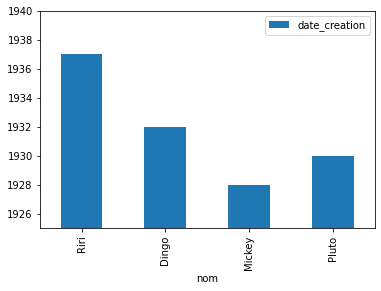

In [33]:
df.plot(kind="bar", ylim=(1925, 1940))

In [37]:
df

,nom,Espece,date_creation
nom,,,
Riri,Riri,Canard,1937
Dingo,Dingo,Chien,1932
Mickey,Mickey,Souris,1928
Pluto,Pluto,Chien,1930


In [34]:
df.loc["Dingo"]

nom              Dingo
Espece           Chien
date_creation     1932
Name: Dingo, dtype: object

In [36]:
df["Espece"]

nom
Riri      Canard
Dingo      Chien
Mickey    Souris
Pluto      Chien
Name: Espece, dtype: object

La liste complète :-) ?

In [41]:
len([a for a in dir(df) if a[0] != "_"])

213

In [42]:
len([a for a in dir(pd) if a[0] != "_"])

119

In [6]:
#df.xs?

## La Series

In [12]:
pd.Series([1,2,10, 21])

0     1
1     2
2    10
3    21
dtype: int64

Une série est un vecteur (ou array) qui comme la dataframe possède une ensemble de méthodes et d'attribus.


In [43]:
s = pd.Series([1,2,10, 21])

In [44]:
[a for a in dir(s) if a[0] != "_"][::15]

['T',
 'array',
 'combine',
 'divide',
 'explode',
 'hist',
 'item',
 'mean',
 'nsmallest',
 'rdivmod',
 'rpow',
 'squeeze',
 'to_json',
 'tz_convert']

In [47]:
len([a for a in dir(s) if a[0] != "_"])

206

Ils en possèdent d'ailleurs beaucoup en commun.

In [48]:
len(set([a for a in dir(df) if a[0] != "_"]
       ).intersection(set([a for a in dir(s) if a[0] != "_"])))

180

Parmis ceux-ci l'attribu du nom

In [54]:
s.name = "coucou"

In [56]:
s

0     1
1     2
2    10
3    21
Name: coucou, dtype: int64

Mais attention, les méthodes ne se comportent pas toujours de la même manière.

Mais au fait, que contient une Series ?

In [57]:
s.values

array([ 1,  2, 10, 21])

Un array ?

In [58]:
type(s.values)

numpy.ndarray

In [59]:
import numpy as np

Un array est un objet de la librairie numpy. Dans les faits c'est une liste qui a quelques comportements différents.

In [60]:
[1,2,3] + [4]

[1, 2, 3, 4]

In [61]:
import numpy as np
np.array([1,2,3] ) + np.array([4] )

array([5, 6, 7])

In [62]:
import numpy as np
np.array([1,2,3] ) + np.array([4,3,12] )

array([ 5,  5, 15])

Avec bien sûr des méthodes diverses et variées (dont certaines sont communes avec celles des series et dataframe, mais qui se comportent aussi parfois de manière différente).

In [131]:
[a for a in dir(np.array([4] )) if a[0] != "_"][::10]

['T', 'choose', 'diagonal', 'imag', 'nonzero', 'round', 'sum', 'view']

### Retour à la série

Du coup une série, c'est un array numpy, wrappé dans un objet qui contient des méthodes et des attribus (tel que le nom, et l'index)

In [64]:
array1 = np.array([1,2,3] )
array2 = np.array([51,666,42] )

In [68]:
pd.Series(array1)==array1

0    True
1    True
2    True
dtype: bool

In [69]:
pd.Series(array1) is array1 ### Ce ne sont pas les mêmes objets plus que la Série possède des méthodes différentes (essentiellement en plus)

False

In [70]:
s = pd.Series(array1)

In [71]:
s.values is array1 ### Mais les deux pointent vers le même objet en mêmoire

True

In [72]:
print(id(array1), id(s.values), id(pd.Series(array1).values), id(s) )

140303437571440 140303437571440 140303437571440 140303421395792


### Retour à la dataframe

In [80]:
df = df.reset_index(drop=True)
df

,nom,Espece,date_creation
0,Riri,Canard,1937
1,Dingo,Chien,1932
2,Mickey,Souris,1928
3,Pluto,Chien,1930


In [81]:
df.nom

0      Riri
1     Dingo
2    Mickey
3     Pluto
Name: nom, dtype: object

In [82]:
type(df.nom)

pandas.core.series.Series

Une colonne, est une serie qui a pour nom le nom de la colonne, et qui a le même index que la dataframe.

In [83]:
type(df.nom.values)

numpy.ndarray

In [184]:
type(df.values)

numpy.ndarray

#### Conclusion

Pandas permet de manipuler des données via l'objet dataframe qui est composé de colonnes qui sont en fait des séries, qui sont composés d'array numpy.

Subtilité: une dataframe d'une seule colone est différent d'une série (Car possède deux index: le vertical `index`, et l'horizontal `columns`)

In [84]:
1+2

3

In [86]:
pd.Series([1,2,3,4]) + pd.Series([1,2,3,4])

0    2
1    4
2    6
3    8
dtype: int64